In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import gensim
import jieba, os
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/project2/ai_challenger_sentiment_analysis_trainingset_20180816/sentiment_analysis_trainingset.csv'

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project2/ai_challenger_sentiment_analysis_trainingset_20180816/sentiment_analysis_trainingset.csv')

In [4]:
# 这是我去网上下载的cboe的word2vec, 估计比我训练的要好
word2vec = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/Colab Notebooks/project2/cn.cbow.bin', binary=True, unicode_errors='ignore')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [5]:
def cut(words):
    detailed_words = []
    _words = words
    while _words:
        words = sorted(jieba.lcut_for_search(_words), key=lambda x: len(x))
        for w in words:
            if _words.startswith(w):
                detailed_words.append(w)
                _words = _words[len(w):]
                break
    return detailed_words

cut('霸王餐'), cut('舍得吃'), *cut('舍得吃霸王餐'), jieba.lcut('舍得吃霸王餐'), cut('霸王')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built successfully.


(['霸王', '餐'], ['舍得', '吃'], '舍得', '吃', '霸王', '餐', ['舍得吃', '霸王餐'], ['霸王'])

In [0]:
content_cut = [jieba.lcut(el) for el in df['content']]

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/project2/百度停用词表.txt', 'r', -1, 'utf8') as f:
    stop_word = f.readlines()
stop_word = set([el.rstrip('\n') for el in stop_word if el.rstrip('\n') ])

In [0]:
content_cut = [[e for e in el if e not in stop_word] for el in content_cut]

In [10]:
_content_cut = []
for el in content_cut:
    sentense = []
    for e in el:
        if e in word2vec.wv:
            sentense.append(e)
        else:
            sentense.extend(cut(e))
    _content_cut.append(sentense)
content_cut = _content_cut

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [0]:
length = sorted([len(el) for el in content_cut])

(array([2.0000e+00, 3.8000e+01, 1.8336e+04, 3.5822e+04, 1.8866e+04,
        1.0130e+04, 6.4990e+03, 4.4710e+03, 3.2280e+03, 2.0920e+03,
        1.3830e+03, 9.7600e+02, 6.9200e+02, 5.3800e+02, 4.0400e+02,
        3.0900e+02, 2.4000e+02, 2.0200e+02, 1.4400e+02, 1.3800e+02,
        9.5000e+01, 7.9000e+01, 5.5000e+01, 3.7000e+01, 4.4000e+01,
        3.1000e+01, 2.9000e+01, 2.7000e+01, 3.1000e+01, 1.7000e+01,
        1.7000e+01, 1.2000e+01, 6.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   9.  ,   41.62,   74.24,  106.86,  139.48,  172.1 ,  204.72,
         237.34,  269.96,  302.58,  335.2 ,  367.82,  400.44,  433.06,
         465.68,  498.3 ,  530.92,  563.54,  596.16,  628.78,  661.4 ,
         694.02,  726.64,  759.26,  791.88,  824.5 ,  857.12,  889.74,
         922.36,  954.98,  987.6 ,

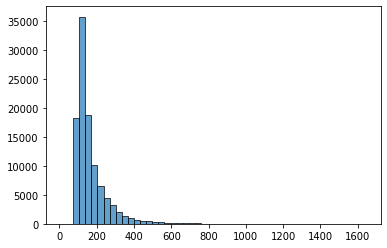

In [12]:
plt.hist(length, bins=50, edgecolor="black", alpha=0.7)

In [13]:
length[int(len(length) * 0.98)]

455

In [0]:
truncate = 450

In [0]:
content_cut = [[word2vec.wv[e] for e in el[:truncate] if e in word2vec.wv] for el in content_cut]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [0]:
# add = np.array([0 for _ in range(300)])

In [0]:
# content_cut = [np.array(el) for el in content_cut]
# for i, el in enumerate(content_cut):
#   content_cut[i] = np.array(el)
df['vec'] = content_cut


In [0]:
df['vec'][0]

In [0]:
# import pickle
# pickle.dump(df, open('train.pkl', 'wb'))
df.to_pickle('/content/drive/My Drive/Colab Notebooks/project2/train.pkl')

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/project2/ai_challenger_sentiment_analysis_validationset_20180816/sentiment_analysis_validationset.csv'

In [0]:
df = pd.read_csv(path)

In [0]:
content_cut = [jieba.lcut(el) for el in df['content']]

content_cut = [[e for e in el if e not in stop_word] for el in content_cut]

_content_cut = []
for el in content_cut:
    sentense = []
    for e in el:
        if e in word2vec.wv:
            sentense.append(e)
        else:
            sentense.extend(cut(e))
    _content_cut.append(sentense)
content_cut = _content_cut

content_cut = [[word2vec.wv[e] for e in el[:truncate] if e in word2vec.wv] for el in content_cut]

for i, el in enumerate(content_cut):
  content_cut[i] = np.array(el)
df['vec'] = content_cut

df.to_pickle('/content/drive/My Drive/Colab Notebooks/project2/validation.pkl')

In [0]:
df = pd.read_pickle(file_name)